In [1]:
!pip install xgboost

# Business Problem Understanding

A third-party travel insurance servicing company that is based in Singapore.

The attributes:
Target: Claim Status (Claim.Status),
Name of agency (Agency),
Type of travel insurance agencies (Agency.Type),
Distribution channel of travel insurance agencies (Distribution.Channel),
Name of the travel insurance products (Product.Name),
Duration of travel (Duration),
Destination of travel (Destination),
Amount of sales of travel insurance policies (Net.Sales),
Commission received for travel insurance agency (Commission),
Gender of insured (Gender),
Age of insured (Age).

Objective: The objective of this particular problem is to predict whether the person will be claimed for insurance or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Dara Understanding

In [3]:
df=pd.read_csv("travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
df.shape

(63326, 11)

In [6]:
df["Claim"].value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

In [7]:
df["Agency"].unique()

array(['CBH', 'CWT', 'JZI', 'KML', 'EPX', 'C2B', 'JWT', 'RAB', 'SSI',
       'ART', 'CSR', 'CCR', 'ADM', 'LWC', 'TTW', 'TST'], dtype=object)

In [8]:
df["Agency Type"].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [9]:
df["Product Name"].unique()

array(['Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Value Plan', 'Basic Plan', 'Premier Plan',
       '2 way Comprehensive Plan', 'Bronze Plan', 'Silver Plan',
       'Annual Silver Plan', 'Cancellation Plan',
       '1 way Comprehensive Plan', 'Ticket Protector', '24 Protect',
       'Gold Plan', 'Annual Gold Plan',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan',
       'Spouse or Parents Comprehensive Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Gold', 'Single Trip Travel Protect Gold',
       'Annual Travel Protect Platinum', 'Child Comprehensive Plan',
       'Travel Cruise Protect', 'Travel Cruise Protect Family'],
      dtype=object)

In [10]:
df["Gender"].unique()

array(['F', nan, 'M'], dtype=object)

# EDA

In [11]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [12]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [13]:
df=df.drop(columns="Gender")

In [14]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

<AxesSubplot:xlabel='Agency', ylabel='Age'>

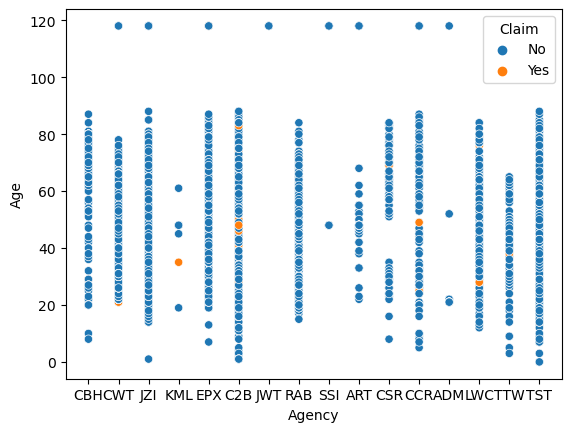

In [15]:
sns.scatterplot(x="Agency",y="Age",hue="Claim",data=df)

<AxesSubplot:xlabel='Age', ylabel='Commision (in value)'>

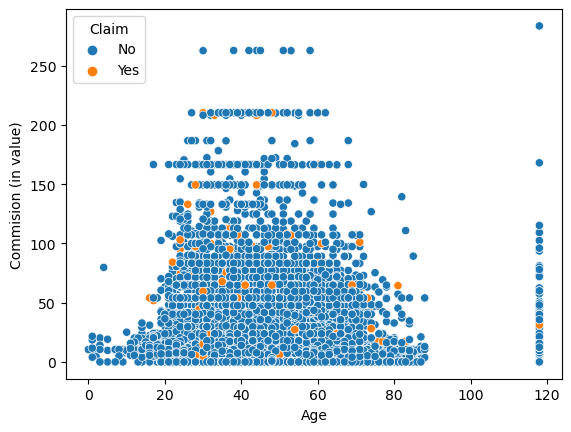

In [16]:
sns.scatterplot(x="Age",y="Commision (in value)",hue="Claim",data=df)

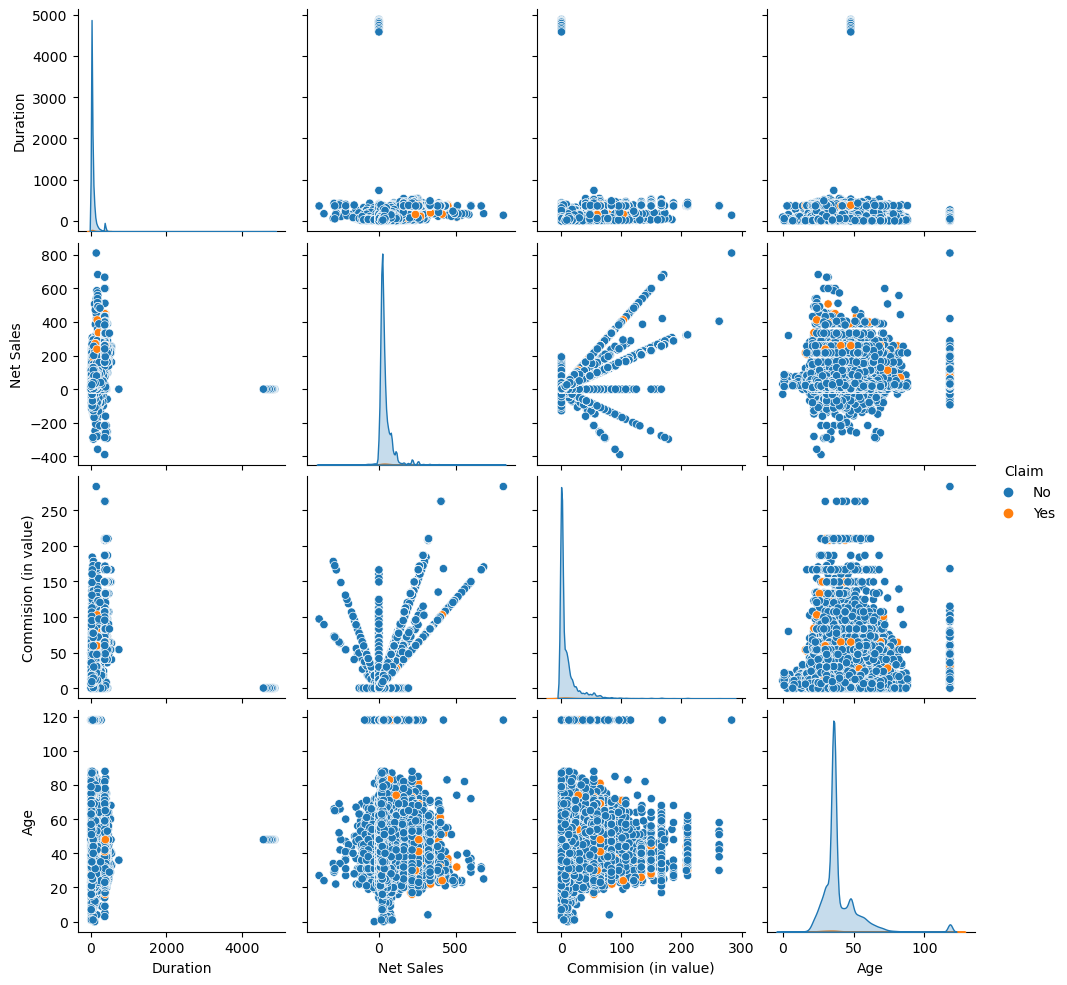

In [17]:
sns.pairplot(df,hue="Claim")

<AxesSubplot:>

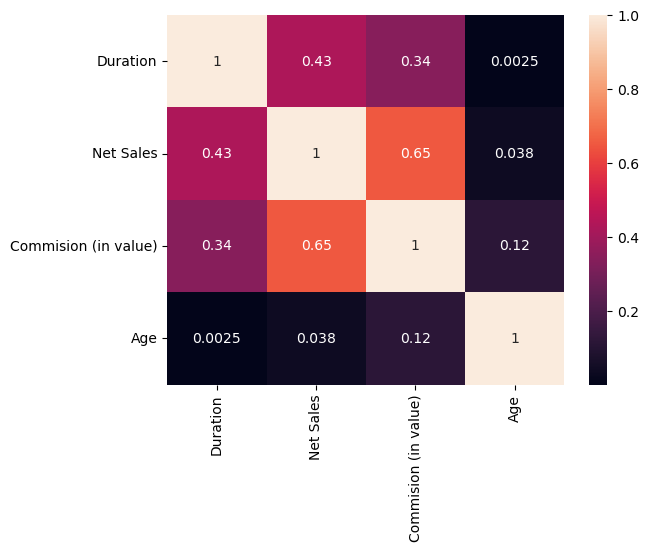

In [18]:
sns.heatmap(df.corr(),annot=True)

# x and  y

In [19]:
x=pd.get_dummies(df.drop("Claim",axis=1),drop_first=True)
y=pd.get_dummies(df["Claim"],drop_first=True)

# Handling Imbalance Data

In [20]:
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
x_new,y_new=SMOTE.fit_resample(x,y)
y_new.value_counts()

Yes
0      62399
1      62399
dtype: int64

# TTS

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3,random_state=101)

# Modelling with default parameters(XG Boost Classifier)

In [22]:
model=XGBClassifier()
model.fit(x_train,y_train)
#prediction
ypredtrain=model.predict(x_train)
ypredtest=model.predict(x_test)
#evaluation
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
print("Train score:",accuracy_score(y_train,ypredtrain))
print("Test score:",accuracy_score(y_test,ypredtest))

Train score: 0.9408869250669658
Test score: 0.937232905982906


In [23]:
#Feature importance
model.feature_importances_
d=pd.DataFrame(index=x.columns,columns=["features"],data=model.feature_importances_)
d

,features
Duration,0.000938
Net Sales,0.002405
Commision (in value),0.000917
Age,0.000932
Agency_ART,0.017385
...,...
Destination_VENEZUELA,0.000000
Destination_VIET NAM,0.004997
"Destination_VIRGIN ISLANDS, U.S.",0.000000
Destination_ZAMBIA,0.000000


In [24]:
imp_features=d[d["features"]>0.01]
imp_features.sort_values("features")

,features
Product Name_Silver Plan,0.010083
Destination_MALAYSIA,0.010410
Product Name_Cancellation Plan,0.010547
Agency_EPX,0.011223
Destination_THAILAND,0.011944
Agency_JZI,0.013430
Agency_ART,0.017385
Agency_SSI,0.018883
Product Name_Value Plan,0.031138
Agency Type_Travel Agency,0.043664


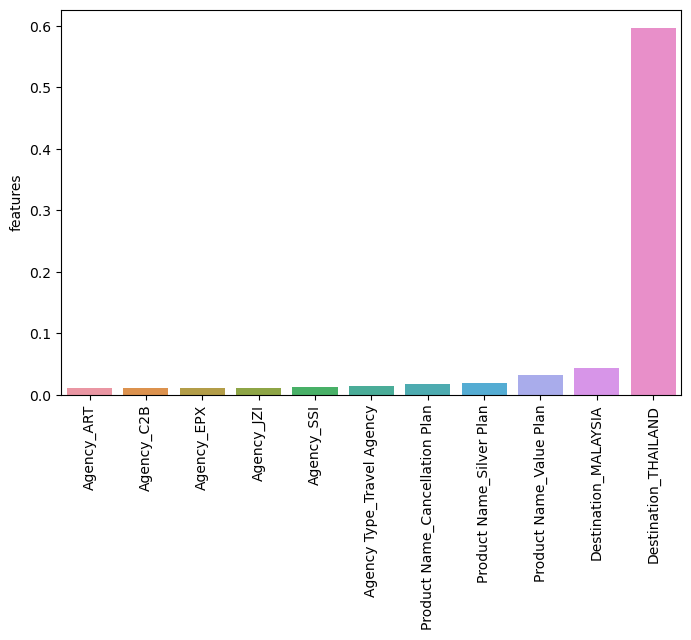

In [25]:
#Visulize tree
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x=imp_features.index,y="features",data=imp_features.sort_values("features"))
plt.xticks(rotation=90)
plt.show()